In [6]:
import os
os.chdir("/Users/kim-wonjin/Documents/CLEWS/Python/Nonlinear/hw5")
import numpy as np
import matplotlib.pyplot as plt
import math

Building on the previous analysis of orbital forcing, let us now investigate how adding long-term trends affects the structure of the insolation signal in phase space and through its recurrence properties.

# 1
Simulate a scenario in which insolation has increased over the past 1 million years by adding a linear trend with
slope = 0.005 (+ 0.005 * np.arange(len(insolation)))to the normalized insolation time series. Embed it with the embedding parameters from the last exercise. (3P)

In [12]:
dat = np.loadtxt('milankovitch_data.dat')
print(dat.shape)

# Checking the data structure
t  = np.arange(1001)
y = dat.T
time = y[0]
ecc = y[1]
obl = y[2]
pre = y[3]
ins = y[4]

# Normalize the insolation time series
ins_norm = (iso - np.mean(iso)) / np.std(iso)
trend = 0.005 * np.arange(len(ins_norm))
scenario = ins_norm + trend

(1001, 5)


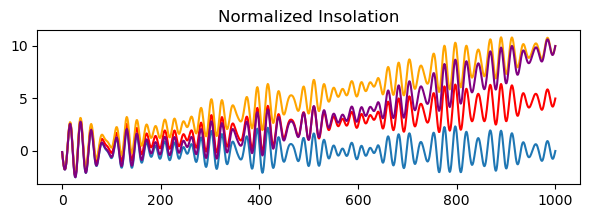

(1001,)


In [ ]:
trend_steeper = 0.01 * np.arange(len(ins_norm))
trend_quad = 1e-5 * (np.arange(len(ins_norm)) ** 2)
scenario2 = ins_norm + trend_steeper
scenario3 = ins_norm + trend_quad

fig, ax = plt.subplots(figsize = (7, 2)) # figsize is adjusting your whole picture size
ax.plot(t, ins_norm)
ax.plot(t, scenario, color = 'red')
ax.plot(t, scenario2, color = 'orange')
ax.plot(t, scenario3, color = 'purple')
ax.set_title("Normalized Insolation")
plt.show()

print(z.shape)



In [54]:
def embed(x: np.ndarray, m: int, tau: int) -> np.ndarray:
    """Embeds a scalar time series in m dimensions with time delay tau.

    Parameters
    ----------
    x : np.ndarray
        The scalar time series
    m : int
        Embedding dimmension
    tau : int
        Time delay

    Returns
    -------
    np.ndarray
        The embedded mutli dimensional time series.
    """
    
    n = len(x)
    k = n - (m - 1) * tau
    z = np.zeros((k, m), dtype="float")
    for i in range(k):
        z[i] = [x[i + j * tau] for j in range(m)]

    return np.stack(z)

In [57]:
# Embedding
emb_origin = embed(ins_norm, m = 4, tau = 5)
emb_sc = embed(scenario, m = 4, tau = 5)
emb_sc_steeper = embed(scenario2, m = 4, tau = 5)
emb_sc_quad = embed(scenario3, m = 4, tau = 5)

## 2
Construct a recurrence matrix from this set of phase space vectors under a sufficient recurrence threshold (see 5.1) and compare the recurrence plots for solar insolation with and without the trend. Explain the difference. How does this difference change when we assume a steeper trend? (7P)

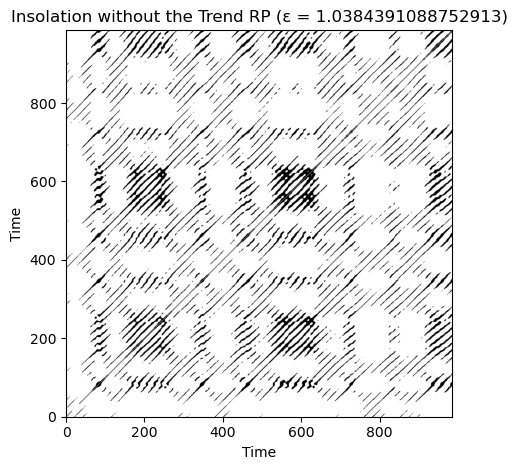

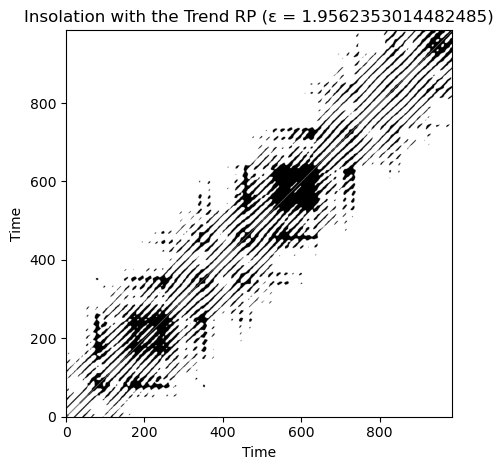

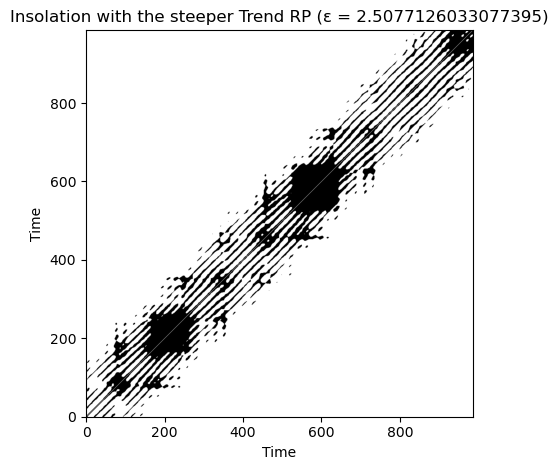

array([[ 0.        ,  0.78838091,  1.5551138 , ..., 20.01749272,
        19.94725939, 19.87265119],
       [ 0.78838091,  0.        ,  0.78918466, ..., 19.9031576 ,
        19.83442453, 19.75723989],
       [ 1.5551138 ,  0.78918466,  0.        , ..., 19.78252209,
        19.71933628, 19.64385059],
       ...,
       [20.01749272, 19.9031576 , 19.78252209, ...,  0.        ,
         0.32455104,  0.64446309],
       [19.94725939, 19.83442453, 19.71933628, ...,  0.32455104,
         0.        ,  0.32844199],
       [19.87265119, 19.75723989, 19.64385059, ...,  0.64446309,
         0.32844199,  0.        ]])

In [58]:

def recur_plot(timeseries_name, timeseries, eps_percentage):
    distance = np.linalg.norm(timeseries[:, None] - timeseries[None, :], axis=2)
    od = np.sort(np.ravel(distance))
    eps_opt = np.quantile(od, eps_percentage)
    R_mat = (distance < eps_opt).astype(int) 
    diag = np.diag_indices_from(R_mat) # remove diagonal for avoiding calculate the distance with itself
    R_mat[diag] = 0
    plt.imshow(R_mat, cmap='binary', origin='lower')
    plt.title(f"{timeseries_name} RP (ε = {eps_opt})")
    plt.ylabel("Time")
    plt.xlabel("Time")
    plt.tight_layout()
    plt.show()
    return distance
recur_plot("Insolation without the Trend", emb_origin, 0.1)
recur_plot("Insolation with the Trend", emb_sc, 0.1)
recur_plot("Insolation with the steeper Trend", emb_sc_steeper, 0.1)

Compared with the recurrence plot without a trend, the recurrence plots of the insolation series with a trend become compressed around the main diagonal.
As the trend becomes steeper, this compression intensifies, and the plot shows recurrence points almost exclusively near the diagonal while the off-diagonal structures disappear.

## Bonus
Predict what you would expect to observe if the data contained a quadratic trend and test this by adding an appropriate quadratic component to the insolation time series. Confirm whether your observations match your expectations. (5P)

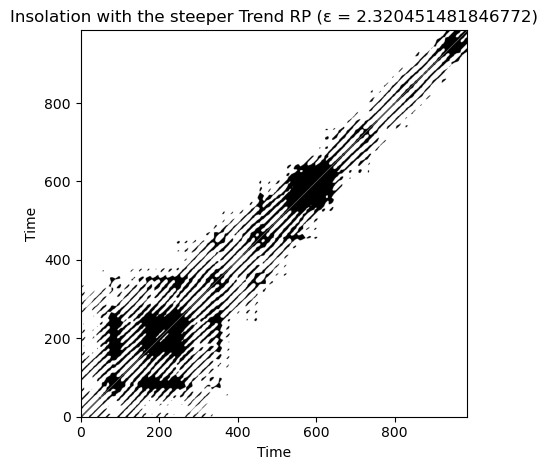

array([[ 0.        ,  0.78406796,  1.54665761, ..., 19.94547096,
        19.89590215, 19.84295052],
       [ 0.78406796,  0.        ,  0.7851619 , ..., 19.84440468,
        19.79629428, 19.74072294],
       [ 1.54665761,  0.7851619 ,  0.        , ..., 19.73890513,
        19.69632881, 19.64244004],
       ...,
       [19.94547096, 19.84440468, 19.73890513, ...,  0.        ,
         0.32388304,  0.64309155],
       [19.89590215, 19.79629428, 19.69632881, ...,  0.32388304,
         0.        ,  0.32775643],
       [19.84295052, 19.74072294, 19.64244004, ...,  0.64309155,
         0.32775643,  0.        ]])

In [59]:
recur_plot("Insolation with the steeper Trend", emb_sc_quad, 0.1)

When a linear trend is added, the recurrence plot becomes compressed around the main diagonal.
With a quadratic trend, I expected a similar effect because it also introduces a long-term increase.
This expectation was partly correct: the RP still shows diagonal compression.

However, the difference is that under a quadratic trend the compression intensifies with increasing time.